# Hollywood Age Gaps

## 1. Data wrangling

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.colorbar as colorbar
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter

In [2]:
#Import data file
dt = pd.read_csv('movies.csv')

In [3]:
#Check data length
len(dt)

1176

In [4]:
#Check null value
dt['Director'].isnull().any()

False

In [5]:
#Set conditions to categorise type of movie relationship
conditions = [
    (dt['Actor 1 Gender'] == dt['Actor 2 Gender']),
    (dt['Actor 1 Age'] == dt['Actor 2 Age']),
    (dt['Actor 1 Gender'] == 'man') & (dt['Actor 2 Gender'] == 'woman') & (dt['Actor 1 Age'] > dt['Actor 2 Age']),
    (dt['Actor 1 Gender'] == 'man') & (dt['Actor 2 Gender'] == 'woman') & (dt['Actor 1 Age'] < dt['Actor 2 Age']),
    (dt['Actor 1 Gender'] == 'woman') & (dt['Actor 2 Gender'] == 'man') & (dt['Actor 1 Age'] < dt['Actor 2 Age']),
    (dt['Actor 1 Gender'] == 'woman') & (dt['Actor 2 Gender'] == 'man') & (dt['Actor 1 Age'] > dt['Actor 2 Age'])]
#Set labels for each conditions
labels = ['Same sex/Same age','Same sex/Same age','Older man','Older woman','Older man','Older woman',]
# Assign labels to conditions
dt['Type'] = np.select(conditions, labels, default='Other')
#Divide data into 3 frames
dt1 = dt[dt['Type'] == 'Same sex/Same age']
dt2 = dt[dt['Type'] == 'Older man']
dt3 = dt[dt['Type'] == 'Older woman']

In [6]:
#Set conditions to categorise age gap buckets
conditions_2 = [
    (dt['Age Difference'] < 10),
    (dt['Age Difference'] >= 20)]
#Set labels for each conditions
labels_2 = ['[0,10)','[20,+)']
# Assign labels to conditions
dt['Gap Bucket'] = np.select(conditions_2, labels_2, default='[10,20)')

In [7]:
#Count movie relationships for each director
cmv = dt.groupby(['Director','Type','Gap Bucket']).size().reset_index(name='Count')
cmv

,Director,Type,Gap Bucket,Count
0,Autumn de Wilde,Older man,"[10,20)",1
1,"Dan Kwan, Daniel Scheinert",Older woman,"[0,10)",1
2,Danny Boyle,Older woman,"[0,10)",1
3,Douglas McGrath,Older man,"[10,20)",1
4,Jon M. Chu,Older man,"[0,10)",1
...,...,...,...,...
855,Zack Snyder,Older woman,"[0,10)",1
856,undefined,Older man,"[0,10)",1
857,undefined,Older man,"[10,20)",1
858,undefined,Older man,"[20,+)",1


In [8]:
#Pivot data
os = cmv.pivot_table(index='Director',columns=['Type','Gap Bucket'],values='Count',fill_value=0)
os

Type                          Older man                Older woman          \
Gap Bucket                       [0,10) [10,20) [20,+)      [0,10) [10,20)   
Director                                                                     
   Autumn de Wilde                  0.0     1.0    0.0         0.0     0.0   
   Dan Kwan, Daniel Scheinert       0.0     0.0    0.0         1.0     0.0   
 Danny Boyle                        0.0     0.0    0.0         1.0     0.0   
 Douglas McGrath                    0.0     1.0    0.0         0.0     0.0   
 Jon M. Chu                         1.0     0.0    0.0         1.0     0.0   
...                                 ...     ...    ...         ...     ...   
Yann Samuell                        1.0     0.0    0.0         0.0     0.0   
Yorgos Lanthimos                    1.0     0.0    0.0         1.0     0.0   
Zach Braff                          1.0     0.0    0.0         0.0     0.0   
Zack Snyder                         1.0     1.0    0.0         1.0     0.0   
undefined                           1.0     1.0    1.0         1.0     0.0   

Type                                 Same sex/Same age                 
Gap Bucket                    [20,+)            [0,10) [10,20) [20,+)  
Director                                                               
   Autumn de Wilde               0.0               0.0     0.0    0.0  
   Dan Kwan, Daniel Scheinert    0.0               0.0     0.0    0.0  
 Danny Boyle                     0.0               0.0     0.0    0.0  
 Douglas McGrath                 0.0               0.0     0.0    0.0  
 Jon M. Chu                      0.0               0.0     0.0    0.0  
...                              ...               ...     ...    ...  
Yann Samuell                     0.0               0.0     0.0    0.0  
Yorgos Lanthimos                 0.0               1.0     1.0    0.0  
Zach Braff                       0.0               0.0     0.0    0.0  
Zack Snyder                      0.0               0.0     0.0    0.0  
undefined                        0.0               0.0     0.0    0.0  

[522 rows x 9 columns]

In [9]:
#Flatten out multi-index pivot table
osp = os
osp.columns = osp.columns.map('_'.join)
osp.reset_index()
osp

,"Older man_[0,10)","Older man_[10,20)","Older man_[20,+)","Older woman_[0,10)","Older woman_[10,20)","Older woman_[20,+)","Same sex/Same age_[0,10)","Same sex/Same age_[10,20)","Same sex/Same age_[20,+)"
Director,,,,,,,,,
Autumn de Wilde,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Dan Kwan, Daniel Scheinert",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Danny Boyle,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Douglas McGrath,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jon M. Chu,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
Yann Samuell,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yorgos Lanthimos,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
Zach Braff,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Determine directors with the highest number of featured movie relationships
dr = dt['Director'].value_counts().head(14)
dr = pd.DataFrame(dr)
dr = dr.rename(columns = {'count':'Number of movies'})
dr

,Number of movies
Director,
Woody Allen,20
John Glen,15
Martin Scorsese,13
Mike Newell,10
Steven Spielberg,10
Terence Young,9
Nancy Meyers,9
David Fincher,9
Guy Hamilton,9


In [11]:
#Merge with age bucket and type analysis
dr = pd.merge(dr,osp,on='Director',how='inner')
dr = dr.reset_index()
dr

,Director,Number of movies,"Older man_[0,10)","Older man_[10,20)","Older man_[20,+)","Older woman_[0,10)","Older woman_[10,20)","Older woman_[20,+)","Same sex/Same age_[0,10)","Same sex/Same age_[10,20)","Same sex/Same age_[20,+)"
0,Woody Allen,20,4.0,7.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
1,John Glen,15,1.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Martin Scorsese,13,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
3,Mike Newell,10,5.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0
4,Steven Spielberg,10,2.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0
5,Terence Young,9,3.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,Nancy Meyers,9,4.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0
7,David Fincher,9,4.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
8,Guy Hamilton,9,1.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
9,Mike Nichols,9,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Turn older woman and same sex/age data value to negative
dr[dr.columns[-6:]]=-dr[dr.columns[-6:]]
dr

,Director,Number of movies,"Older man_[0,10)","Older man_[10,20)","Older man_[20,+)","Older woman_[0,10)","Older woman_[10,20)","Older woman_[20,+)","Same sex/Same age_[0,10)","Same sex/Same age_[10,20)","Same sex/Same age_[20,+)"
0,Woody Allen,20,4.0,7.0,9.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,John Glen,15,1.0,6.0,8.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,Martin Scorsese,13,2.0,5.0,2.0,-4.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,Mike Newell,10,5.0,1.0,1.0,-2.0,-0.0,-0.0,-1.0,-0.0,-0.0
4,Steven Spielberg,10,2.0,3.0,3.0,-1.0,-0.0,-0.0,-1.0,-0.0,-0.0
5,Terence Young,9,3.0,5.0,0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0
6,Nancy Meyers,9,4.0,0.0,2.0,-1.0,-1.0,-0.0,-1.0,-0.0,-0.0
7,David Fincher,9,4.0,2.0,1.0,-2.0,-0.0,-0.0,-0.0,-0.0,-0.0
8,Guy Hamilton,9,1.0,3.0,4.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0
9,Mike Nichols,9,3.0,3.0,1.0,-2.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [13]:
#Reverse row order to plot in descending order
dr = dr[::-1]

# 2. Plotting

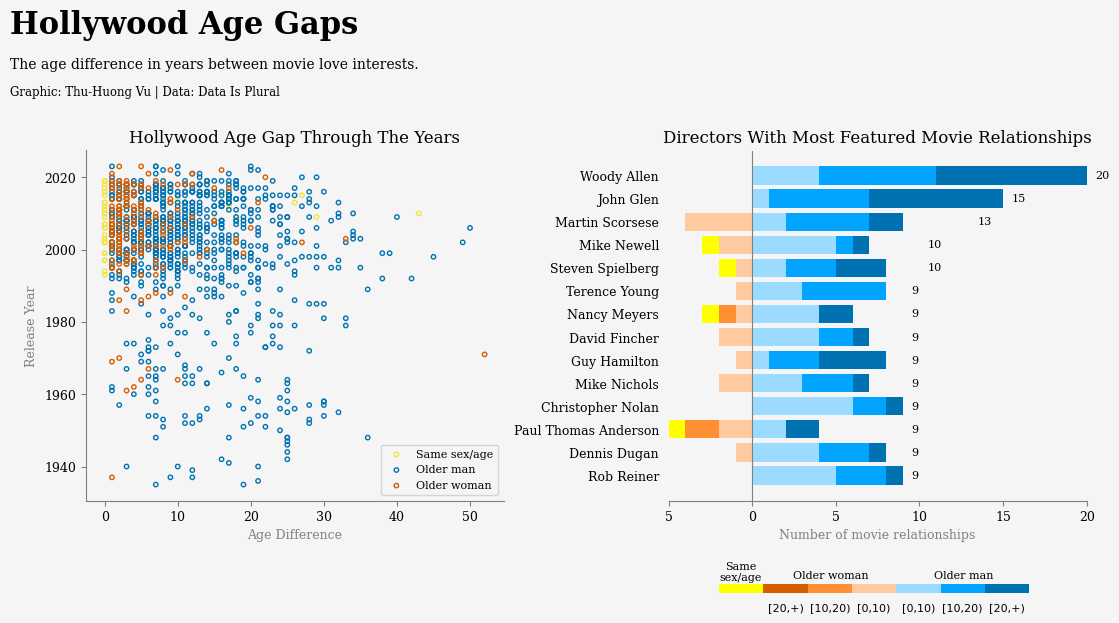

In [14]:
#------------Create figure and grid specification------------
#Create figure with set size
fig, ax = plt.subplots(figsize=(11, 5))
#Create grid of 2x2
gs = GridSpec(2, 2, width_ratios=[1,1], height_ratios=[2, 1], hspace=0.1)
#Mute the grid axes
plt.axis('off')
#Set font
font = 'serif'
#Set facecolor
facecolor = '#F5F5F5'
#Set background color
fig.patch.set_facecolor(facecolor)


#------------Add figure title and descriptions------------
plt.text(-0.25,1.20, 'Hollywood Age Gaps', fontsize=22, ha='left', va='baseline', fontname = font, fontweight='bold', color='black')
plt.text(-0.25,1.11, 'The age difference in years between movie love interests.', fontsize=10, ha='left', va='baseline', fontname = font, color='black')
plt.text(-0.25,1.04, 'Graphic: Thu-Huong Vu | Data: Data Is Plural', fontsize=8.5, ha='left', va='baseline', fontname = font, color='black')

#------------Draw scatterplot------------
#Specify subplot position
ax1 = plt.subplot(gs[0, 0])
#Plotting scatterplot
ax1.scatter(dt1['Age Difference'],dt1['Release Year'],label = 'Same sex/age',
            edgecolor = '#F0E442',facecolor = 'none', marker = 'o',s = 10)
ax1.scatter(dt2['Age Difference'],dt2['Release Year'],label = 'Older man',
            edgecolor = '#0072B2',facecolor = 'none', marker = 'o',s = 10)
ax1.scatter(dt3['Age Difference'],dt3['Release Year'],label = 'Older woman',
            edgecolor = '#D55E00',facecolor = 'none', marker = 'o',s = 10)
#Format chart frame
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color('gray')
ax1.spines['left'].set_color('gray')
#Set axis labels
ax1.set_xlabel('Age Difference',color='gray',fontname=font,fontsize=9)
ax1.set_ylabel('Release Year',color='gray',fontname=font,fontsize=9)
#Set ticks color
ax1.tick_params(axis='x',color='gray',labelfontfamily=font,labelsize=9)
ax1.tick_params(axis='y',color='gray',labelfontfamily=font,labelsize=9)
#Set title
ax1.set_title('Hollywood Age Gap Through The Years',fontname=font,size=12)
#Set legend
ax1.legend(prop={'size': 8, 'family': font},loc='lower right',facecolor=facecolor)
#Set plot background color
ax1.set_facecolor(facecolor)


#------------Draw horizontal stacked bar chart------------
#Specify subplot position
ax2 = plt.subplot(gs[0, 1])
#Plotting horizontal stacked bar chart - Older man type
ax2.barh(dr['Director'], dr['Older man_[0,10)'], label='Older man_[0,10)',color='#9BDBFF')
ax2.barh(dr['Director'], dr['Older man_[10,20)'],
         left=dr['Older man_[0,10)'], label='Older man_[10,20)',color='#01A4FF')
ax2.barh(dr['Director'], dr['Older man_[20,+)'],
         left=sum([dr['Older man_[0,10)'],dr['Older man_[10,20)']]),
         label='Older man_[20,+)',color='#0072B2')
#Plotting horizontal stacked bar chart - Older woman type
ax2.barh(dr['Director'], dr['Older woman_[0,10)'], label='Older woman_[0,10)',color='#FFCA9F')
ax2.barh(dr['Director'], dr['Older woman_[10,20)'],
         left=dr['Older woman_[0,10)'], label='Older woman_[10,20)',color='#FF8F33')
ax2.barh(dr['Director'], dr['Older woman_[20,+)'],
         left=sum([dr['Older woman_[0,10)'], dr['Older woman_[10,20)']]), label='Older woman_[20,+)',color='#D55E00')
ax2.barh(dr['Director'], dr['Same sex/Same age_[0,10)'],
         left=sum([dr['Older woman_[0,10)'], dr['Older woman_[10,20)'],dr['Older woman_[20,+)']]), label='Same sex/Same age',color='#FFFF00')
#Draw a vertical line at x=0
plt.axvline(x=0, color='gray', linestyle='-',linewidth=0.8)
#Format chart frame
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_color('gray')
ax2.spines['left'].set_visible(False)
#Adding labels and legend
ax2.set_title('Directors With Most Featured Movie Relationships',fontname=font,size=12)
#Set axis labels
ax2.set_xlabel('Number of movie relationships',color='gray',fontname=font,position='top',fontsize=9)
#Set ticks color
ax2.tick_params(axis='x',color='gray',labelfontfamily=font,labelsize=9)
ax2.tick_params(axis='y',left=False,color='gray',labelfontfamily=font,labelsize=9)
#Set plot background color
ax2.set_facecolor(facecolor)
#Apply custom formatter to x axis ticks
def format_positive(value, _):
    return f'{abs(value):,.0f}'
ax2.xaxis.set_major_formatter(FuncFormatter(format_positive))
#Set x axis range
ax2.set_xlim(-5, 20)
#Add labels next to the horizontal bars
for index, value in enumerate(dr['Number of movies']):
    ax2.text(value+0.5, index, str(value), va='center',fontname=font,fontsize=8)


#------------Draw color bar as legend for stacked bar chart------------
#Specify colors
colors_range = ['#FFFF00','#D55E00','#FF8F33','#FFCA9F','#9BDBFF','#01A4FF','#0072B2']
#Generate listed colormap for plotting
cmap = mcolors.ListedColormap(colors_range)
#Define labels
labels = ['','[20,+)','[10,20)','[0,10)','[0,10)','[10,20)','[20,+)']
#Specify subplot position
ax3 = plt.subplot(gs[1,1])
#Create the color bar
cax = ax3.inset_axes([0.08, -0.8, 0.8, 0.08],autoscalex_on=True) #[x, y, width, height]
cbar = colorbar.Colorbar(cax,
                         orientation='horizontal',
                         cmap=cmap,
                         norm=plt.Normalize(-0.5, 6.5))
#Set the ticks
cbar.set_ticks(range(7))
cbar.ax.set_xticklabels(labels, fontsize=8)
cbar.ax.tick_params(axis='x', bottom=False)
#Set labels for customized legend
cbar.ax.text(0.07, 3.3, 'Same\nsex/age', ha='center', va='top', fontsize=8, fontname=font, transform=cbar.ax.transAxes)
cbar.ax.text(0.36, 2.3, 'Older woman', ha='center', va='top', fontsize=8, fontname=font, transform=cbar.ax.transAxes)
cbar.ax.text(0.79, 2.3, 'Older man', ha='center', va='top', fontsize=8, fontname=font, transform=cbar.ax.transAxes)
#Mute the edge color
cbar.outline.set_edgecolor(None)
cbar.solids.set_edgecolor(None)
#Mute the axes
plt.axis('off')


#------------Adjust subplots position------------
ax1.set_position([0, 0.1, 0.38, 0.7]) #left, bottom, width, height
ax2.set_position([0.53, 0.1, 0.38, 0.7]) #left, bottom, width, height

#------------Save figure------------
plt.savefig('Hollywood_Age_Gaps.svg', format='svg', bbox_inches='tight')
plt.savefig('Hollywood_Age_Gaps.pdf', format='pdf', bbox_inches='tight')